# Ford GoBike System Data

## by Ahmed Gamal

## Investigation Overview
I will start first by illustrating the general features of users and try to investigate Its relationship with the trip and how those features could affect the duration and numbers of the trips per weekdays and hours.  


## Dataset Overview
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. the dataset consists of 183412 rows representing the number of the trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv("201902-fordgobike-tripdata.csv")


In [3]:
df["duration_sec"]=df["duration_sec"]/60 #convert to min
df.rename(columns={"duration_sec":"duration_min"},inplace=True)#rename the column
df["Age"]=2019-df["member_birth_year"] #create the age column 
df["start_time"]=pd.to_datetime(df["start_time"])#convert from string to datetime 
df["hour"]=df["start_time"].dt.hour #create the hour column 
df["days"]=df["start_time"].dt.day_name()#create the days columns 
df2=df.loc[df["member_gender"].isin(["Male","Female"])]# create a new  dataset that didn't contain "other" in gender to avoid distracting 



> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The distribution of the user types and genders
most of the users are subscribers, the number of subscribers is more than customers and the majority of users are males 




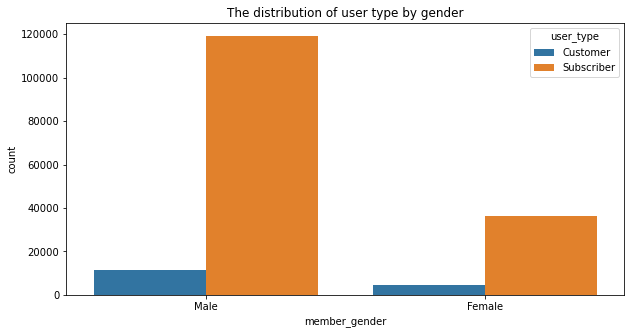

In [4]:
plt.figure(figsize=(10,5))
sb.countplot(data=df2,x="member_gender",hue="user_type");
plt.title("The distribution of user type by gender");

## The distribution of users ages

the majority of the age of users range between 20 and 40

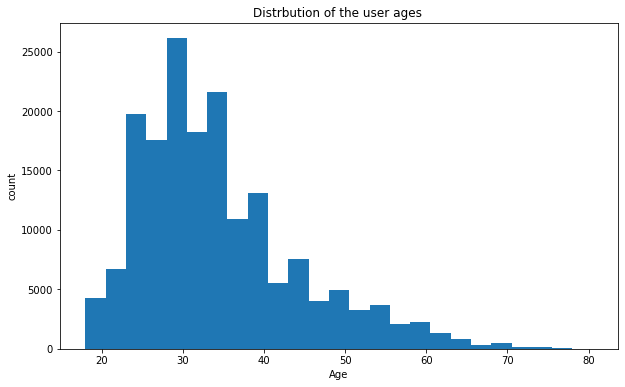

In [5]:
plt.figure(figsize=(10,6));
bins2=np.arange(df["Age"].min(),80+1.5,2.5) #to optimize the edge of bins 
plt.hist(df["Age"],bins=bins2);
plt.title("Distrbution of the user ages ");
plt.xlabel("Age");
plt.ylabel("count");

## The age of users by gender

From the box plot we can see that males are a bit older than Females
From the Violin plot we can that,there is a broader range in female age approximately between 25-35 and that's makes sense since that male are a bit older than Females


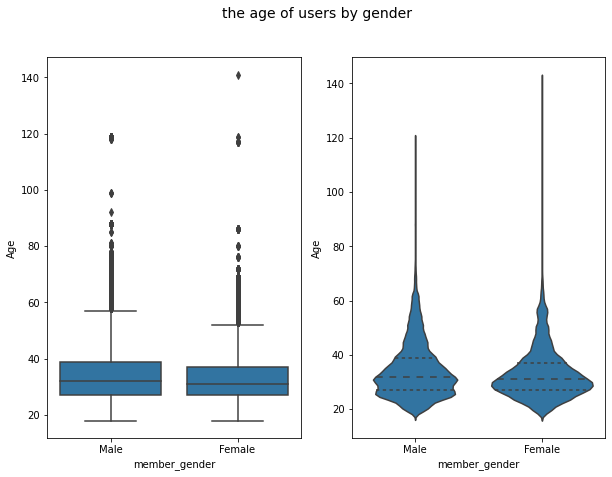

In [6]:
color=sb.color_palette()[0]
fig=plt.figure(figsize=(10,7))
fig.suptitle("the age of users by gender",fontsize=14)
plt.subplot(1,2,1)
sb.boxplot(data=df2,x="member_gender",y="Age",color=color);
plt.subplot(1,2,2)
sb.violinplot(data=df2,x="member_gender",y="Age",color=color,inner="quartile");


## The age of the users by user type

It seems there is no difference between the ages of the customers and subscribers,but the Age of subscribers exceeds the customer age by a very small margin,and that can be explained by the wider range between 25-35 years in customer age than the same range in subscribers age.


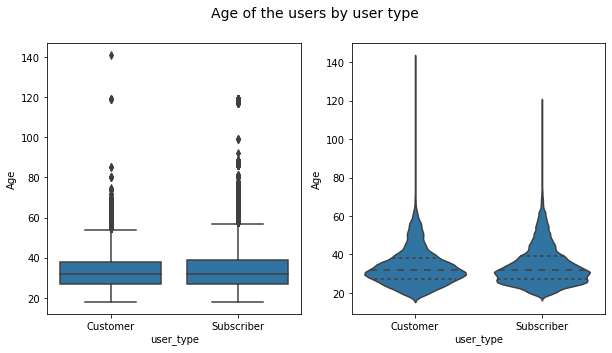

In [7]:
fig=plt.figure(figsize=(10,5))
fig.suptitle("Age of the users by user type ",fontsize=14)
plt.subplot(1,2,1)
sb.boxplot(data=df2,x="user_type",y="Age",color=color);
plt.subplot(1,2,2)
sb.violinplot(data=df2,x="user_type",y="Age",color=color,inner="quartile");


## what is the range of the duration of the trips in minutes?

Most of the duration of the trips ranges between 1-20 minutes

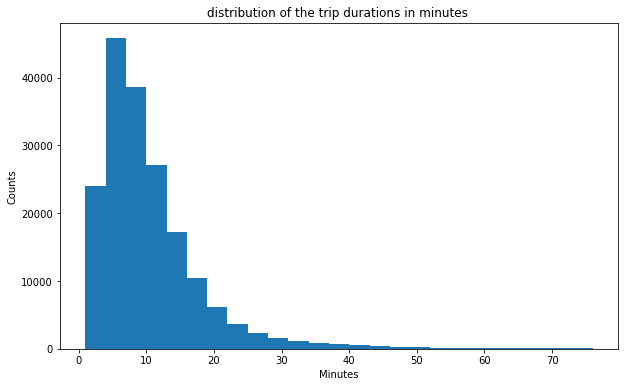

In [12]:
plt.figure(figsize=(10,6));
bins=np.arange(1,75+3,3) #to optimize the edge of bins 
plt.hist(df["duration_min"],bins=bins);
plt.xlabel("Minutes");
plt.ylabel("Counts");
plt.title("distribution of the trip durations in minutes ");


## The relationship between the Average duration in minutes by user type and gender

The average trip duration in minutes of customers generally are longer than subscribers, the female trips are longer than male trips on average¶


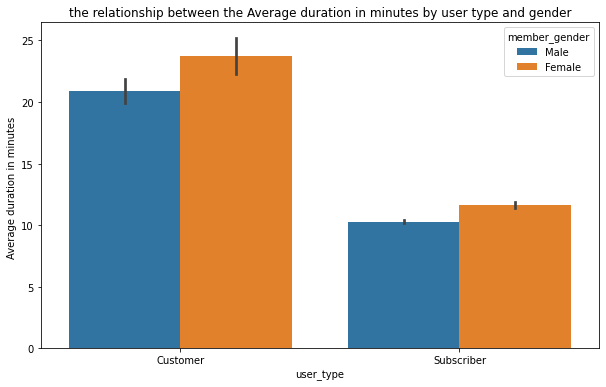

In [13]:
plt.figure(figsize=(10,6));
sb.barplot(data=df2,x="user_type",y="duration_min",hue="member_gender");
plt.ylabel("Average duration in minutes ");
plt.title("the relationship between the Average duration in minutes by user type and gender");

## The most common hours in the day which the trips start

the most common start trip hours are 8:00 and 17:00, and that makes sense since the traditional American business hours are 9:00 a.m. to 5:00 p.m., according to this [article](https://en.wikipedia.org/wiki/Working_time#:~:text=The%20traditional%20American%20business%20hours,comprising%2040%20hours%20in%20total.)  

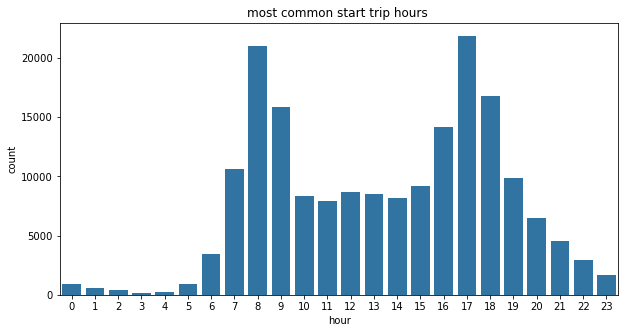

In [14]:
plt.figure(figsize=(10,5))
sb.countplot(data=df,x="hour",color=sb.color_palette()[0]);
plt.title("most common start trip hours ");

## The number of trips by weekdays

The largest numbers of trips was recorded Thursday and Tuesday,the lowest numbers of trips was recorded weekends (Saturday, Sunday) days and it's nearly equal

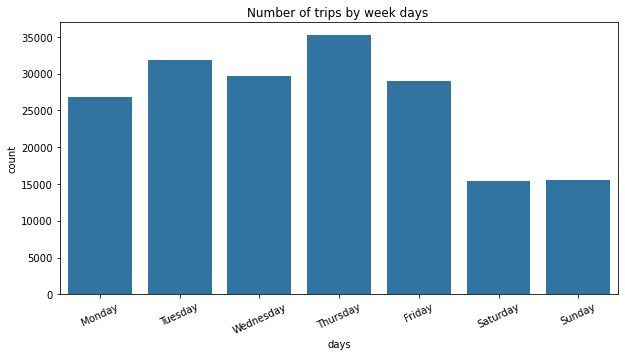

In [15]:
plt.figure(figsize=(10,5))
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=df,x="days",color=sb.color_palette()[0],order=order);
plt.title("Number of trips by week days ")
plt.xticks(rotation=25);

## The number of trips by gender and days of week
Although the number of trips of  males is more than females, there is no actual difference  in the pattern of both gender than previous plot  that depicts the number of trips by weekdays, The largest numbers of trips are on Thursday and Tuesday, the lowest number of trips was recorded on weekends (Saturday, Sunday) days and it's nearly equal

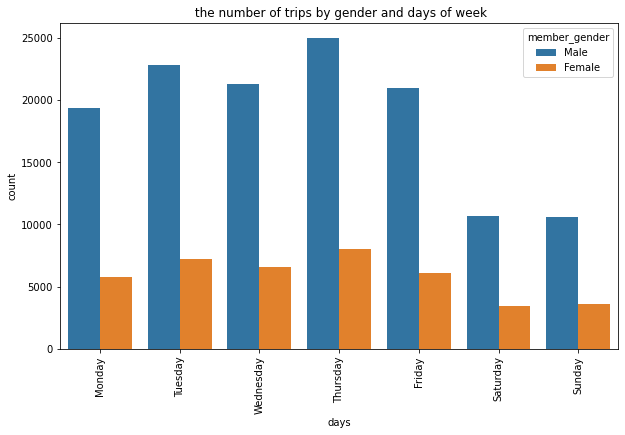

In [16]:
plt.figure(figsize=(10,6));
sb.countplot(data=df2,x="days",hue="member_gender",order=order);
plt.title(" the number of trips by gender and days of week")
plt.xticks(rotation=90);

## The relationships between the number of the trips by weekdays, user type and user gender

Surprisingly, the customer user type (especially the female) doesn't follow the same manner as the Subscribers user type which depicted in the previous plots.

but in both user types Thursday have the highest number of trips which is consistent with the previous plots 

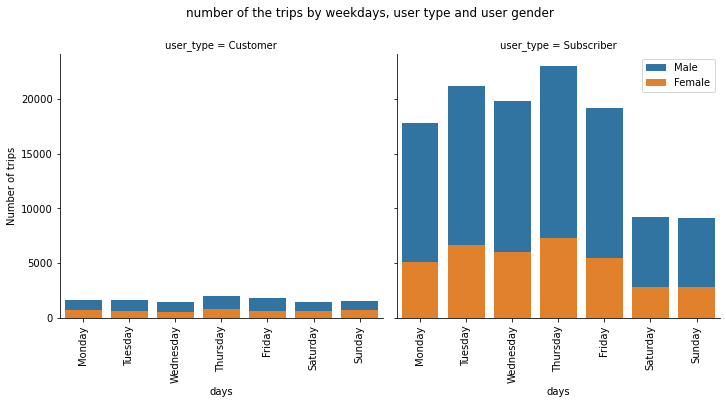

In [17]:
g=sb.FacetGrid(data =df2, col="user_type",hue="member_gender",margin_titles=True,height=5)
g.map(sb.countplot,"days",order=order);
g.set_xticklabels(rotation=90,);
g.set_ylabels("Number of trips");
plt.subplots_adjust(top=0.85)
plt.suptitle("number of the trips by weekdays, user type and user gender") 
plt.legend();